In [1]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create my_spark
spark = SparkSession.builder.getOrCreate()

# Print my_spark
print(spark)

# Print my_spark version
print(spark.version)

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

### Viewing tables
Once you've created a SparkSession, you can start poking around to see what data is in your cluster!

Your SparkSession has an attribute called catalog which lists all the data inside the cluster. This attribute has a few methods for extracting different pieces of information.

One of the most useful is the .listTables() method, which returns the names of all the tables in your cluster as a list.


In [ ]:
# Print the tables in the catalog
print(spark.catalog.listTables())

### Are you query-ious?
One of the advantages of the DataFrame interface is that you can run SQL queries on the tables in your Spark cluster. If you don't have any experience with SQL, don't worry, we'll provide you with queries! (To learn more SQL, start with our Introduction to SQL course.)

As you saw in the last exercise, one of the tables in your cluster is the flights table. This table contains a row for every flight that left Portland International Airport (PDX) or Seattle-Tacoma International Airport (SEA) in 2014 and 2015.

Running a query on this table is as easy as using the .sql() method on your SparkSession. This method takes a string containing the query and returns a DataFrame with the results!

If you look closely, you'll notice that the table flights is only mentioned in the query, not as an argument to any of the methods. This is because there isn't a local object in your environment that holds that data, so it wouldn't make sense to pass the table as an argument.

Remember, we've already created a SparkSession called spark in your workspace. (It's no longer called my_spark because we created it for you!)

In [ ]:
# Don't change this query
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = spark.sql(query)

# Show the results
flights10.show()

### Pandafy a Spark DataFrame

Suppose you've run a query on your huge dataset and aggregated it down to something a little more manageable.

Sometimes it makes sense to then take that table and work with it locally using a tool like pandas. Spark DataFrames make that easy with the .toPandas() method. Calling this method on a Spark DataFrame returns the corresponding pandas DataFrame. It's as simple as that!

This time the query counts the number of flights to each airport from SEA and PDX.

Remember, there's already a SparkSession called spark in your workspace!

In [ ]:
# Don't change this query
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

### Put some Spark in your data

In the last exercise, you saw how to move data from Spark to pandas. However, maybe you want to go the other direction, and put a pandas DataFrame into a Spark cluster! The SparkSession class has a method for this as well.

The .createDataFrame() method takes a pandas DataFrame and returns a Spark DataFrame.

The output of this method is stored locally, not in the SparkSession catalog. This means that you can use all the Spark DataFrame methods on it, but you can't access the data in other contexts.

For example, a SQL query (using the .sql() method) that references your DataFrame will throw an error. To access the data in this way, you have to save it as a temporary table.

You can do this using the .createTempView() Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the catalog, but as this table is temporary, it can only be accessed from the specific SparkSession used to create the Spark DataFrame.

There is also the method .createOrReplaceTempView(). This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. You'll use this method to avoid running into problems with duplicate tables.

Check out the diagram to see all the different ways your Spark data structures interact with each other.

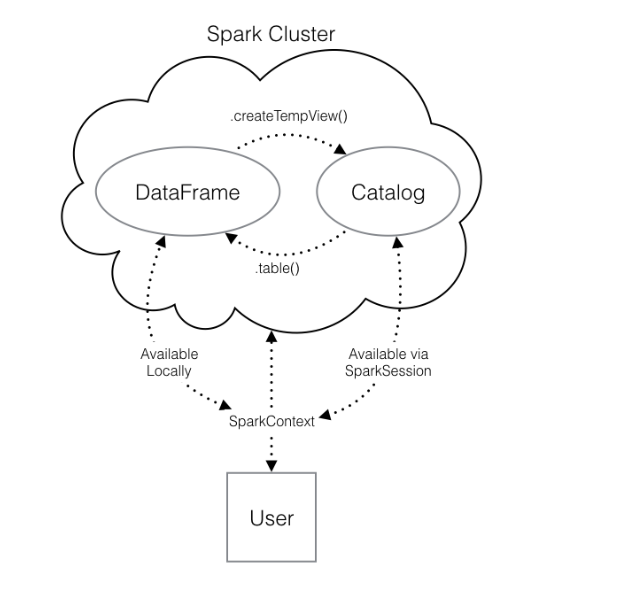

There's already a SparkSession called spark in your workspace, numpy has been imported as np, and pandas as pd.

In [ ]:
# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView('temp')

# Examine the tables in the catalog again
print(spark.catalog.listTables())

### Dropping the middle man

Now you know how to put data into Spark via pandas, but you're probably wondering why deal with pandas at all? Wouldn't it be easier to just read a text file straight into Spark? Of course it would!

Luckily, your SparkSession has a .read attribute which has several methods for reading different data sources into Spark DataFrames. Using these you can create a DataFrame from a .csv file just like with regular pandas DataFrames!

The variable file_path is a string with the path to the file airports.csv. This file contains information about different airports all over the world.

A SparkSession named spark is available in your workspace.

In [ ]:
# Don't change this file path
file_path = "./airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path, header=True)

# Show the data
airports.show()

### Filtering Data

Now that you have a bit of SQL know-how under your belt, it's easier to talk about the analogous operations using Spark DataFrames.

Let's take a look at the .filter() method. As you might suspect, this is the Spark counterpart of SQL's WHERE clause. The .filter() method takes either an expression that would follow the WHERE clause of a SQL expression as a string, or a Spark Column of boolean (True/False) values.

For example, the following two expressions will produce the same output:

flights.filter("air_time > 120").show()
flights.filter(flights.air_time > 120).show()
Notice that in the first case, we pass a string to .filter(). In SQL, we would write this filtering task as SELECT * FROM flights WHERE air_time > 120. Spark's .filter() can accept any expression that could go in the WHEREclause of a SQL query (in this case, "air_time > 120"), as long as it is passed as a string. Notice that in this case, we do not reference the name of the table in the string -- as we wouldn't in the SQL request.

In the second case, we actually pass a column of boolean values to .filter(). Remember that flights.air_time > 120 returns a column of boolean values that has True in place of those records in flights.air_time that are over 120, and False otherwise.

Remember, a SparkSession called spark is already in your workspace, along with the Spark DataFrame flights.

#### Instructions
- Use the .filter() method to find all the flights that flew over 1000 miles two ways:
    - First, pass a SQL string to .filter() that checks whether the distance is greater than 1000. Save this as long_flights1.
    - Then pass a column of boolean values to .filter() that checks the same thing. Save this as long_flights2.
- Use .show() to print heads of both DataFrames and make sure they're actually equal!

In [ ]:
# Filter flights by passing a string
long_flights1 = flights.filter("distance > 1000")

# Filter flights by passing a column of boolean values
long_flights2 = flights.filter(flights.distance > 1000)

# Print the data to check they're equal
long_flights1.show()
long_flights2.show()

### Selecting

The Spark variant of SQL's SELECT is the .select() method. This method takes multiple arguments - one for each column you want to select. These arguments can either be the column name as a string (one for each column) or a column object (using the df.colName syntax). When you pass a column object, you can perform operations like addition or subtraction on the column to change the data contained in it, much like inside .withColumn().

The difference between .select() and .withColumn() methods is that .select() returns only the columns you specify, while .withColumn() returns all the columns of the DataFrame in addition to the one you defined. It's often a good idea to drop columns you don't need at the beginning of an operation so that you're not dragging around extra data as you're wrangling. In this case, you would use .select() and not .withColumn().

Remember, a SparkSession called spark is already in your workspace, along with the Spark DataFrame flights.

#### Instructions
- Select the columns "tailnum", "origin", and "dest" from flights by passing the column names as strings. Save this as selected1.
- Select the columns "origin", "dest", and "carrier" using the df.colName syntax and then filter the result using both of the filters already defined for you (filterA and filterB) to only keep flights from SEA to PDX. Save this as selected2.